In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from collections import Counter
import matplotlib.pyplot as plt

In [179]:
np.random.seed(0) #for consistency

trainData = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

# Analysing Data

In [3]:
trainData.isnull().any()

P1        False
P2        False
P3        False
P4        False
P5        False
P6        False
P7        False
P8        False
P9        False
P10       False
P11       False
P12       False
P13       False
P14       False
P15       False
P16       False
P17       False
P18       False
P19       False
P20       False
P21       False
P22       False
P23       False
Target    False
dtype: bool

In [4]:
trainData.describe()

P1          P2          P3            P4            P5  \
count  977.000000  977.000000  977.000000    977.000000    977.000000   
mean    20.392419   43.102962    1.618219  31521.536745  31585.130809   
std     10.952023   23.953519    0.953099  11970.488291  12015.109798   
min      3.141500    2.718280    0.000000  12000.000000  12570.000000   
25%      9.424500   21.746240    1.000000  23700.000000  23700.000000   
50%     18.849000   43.492480    2.000000  30720.000000  30720.000000   
75%     31.415000   62.520440    2.000000  39400.000000  39400.000000   
max     37.698000   84.266680    3.000000  69150.000000  69350.000000   

                 P6            P7           P8            P9           P10  \
count    977.000000    977.000000   977.000000    977.000000    977.000000   
mean   32386.263357  30615.838280   279.948823  31483.447369  31485.327840   
std    12301.588877  11592.811805   268.492485  11878.287776  11846.453091   
min    12725.500000  11500.000000    10.000000  12641.800000  12682.160000   
25%    24224.500000  23100.000000   110.000000  23820.000000  23786.360000   
50%    31513.000000  29751.000000   210.000000  30794.600000  30891.630000   
75%    40732.200000  38250.000000   350.000000  39431.200000  39354.230000   
max    69950.000000  66800.000000  2580.000000  67468.200000  65823.520000   

       ...           P15           P16          P17          P18  \
count  ...    977.000000    977.000000   977.000000   977.000000   
mean   ...  31028.519884  30876.930502   378.666013   373.333088   
std    ...  11333.933096  11420.896475  1840.111247  1730.076846   
min    ...  13199.853850   1037.037037 -5247.456496 -4711.835779   
25%    ...  23543.153850  23636.065820  -607.464053  -581.777848   
50%    ...  30856.315380  30873.389250   104.510233   129.070917   
75%    ...  39444.388460  39271.858710  1212.516354  1172.252928   
max    ...  56281.142310  56579.882160  9094.371611  8192.989015   

                P19         P20         P21        P22         P23      Target  
count    977.000000  977.000000  977.000000  977.00000  977.000000  977.000000  
mean   21749.866940    1.383920   -1.164923   54.00955    0.271965    0.530194  
std     9615.611691    0.734752    0.677263   15.36885    3.937104    0.499343  
min    -1060.000000    0.000000   -4.400000    0.00000  -32.340000    0.000000  
25%    16540.000000    0.860000   -1.450000   43.34000   -1.280000    0.000000  
50%    17600.000000    1.250000   -1.000000   52.73000    0.230000    1.000000  
75%    30700.000000    1.740000   -0.680000   65.47000    1.890000    1.000000  
max    40340.000000    4.400000   -0.050000   95.83000   20.870000    1.000000  

[8 rows x 24 columns]

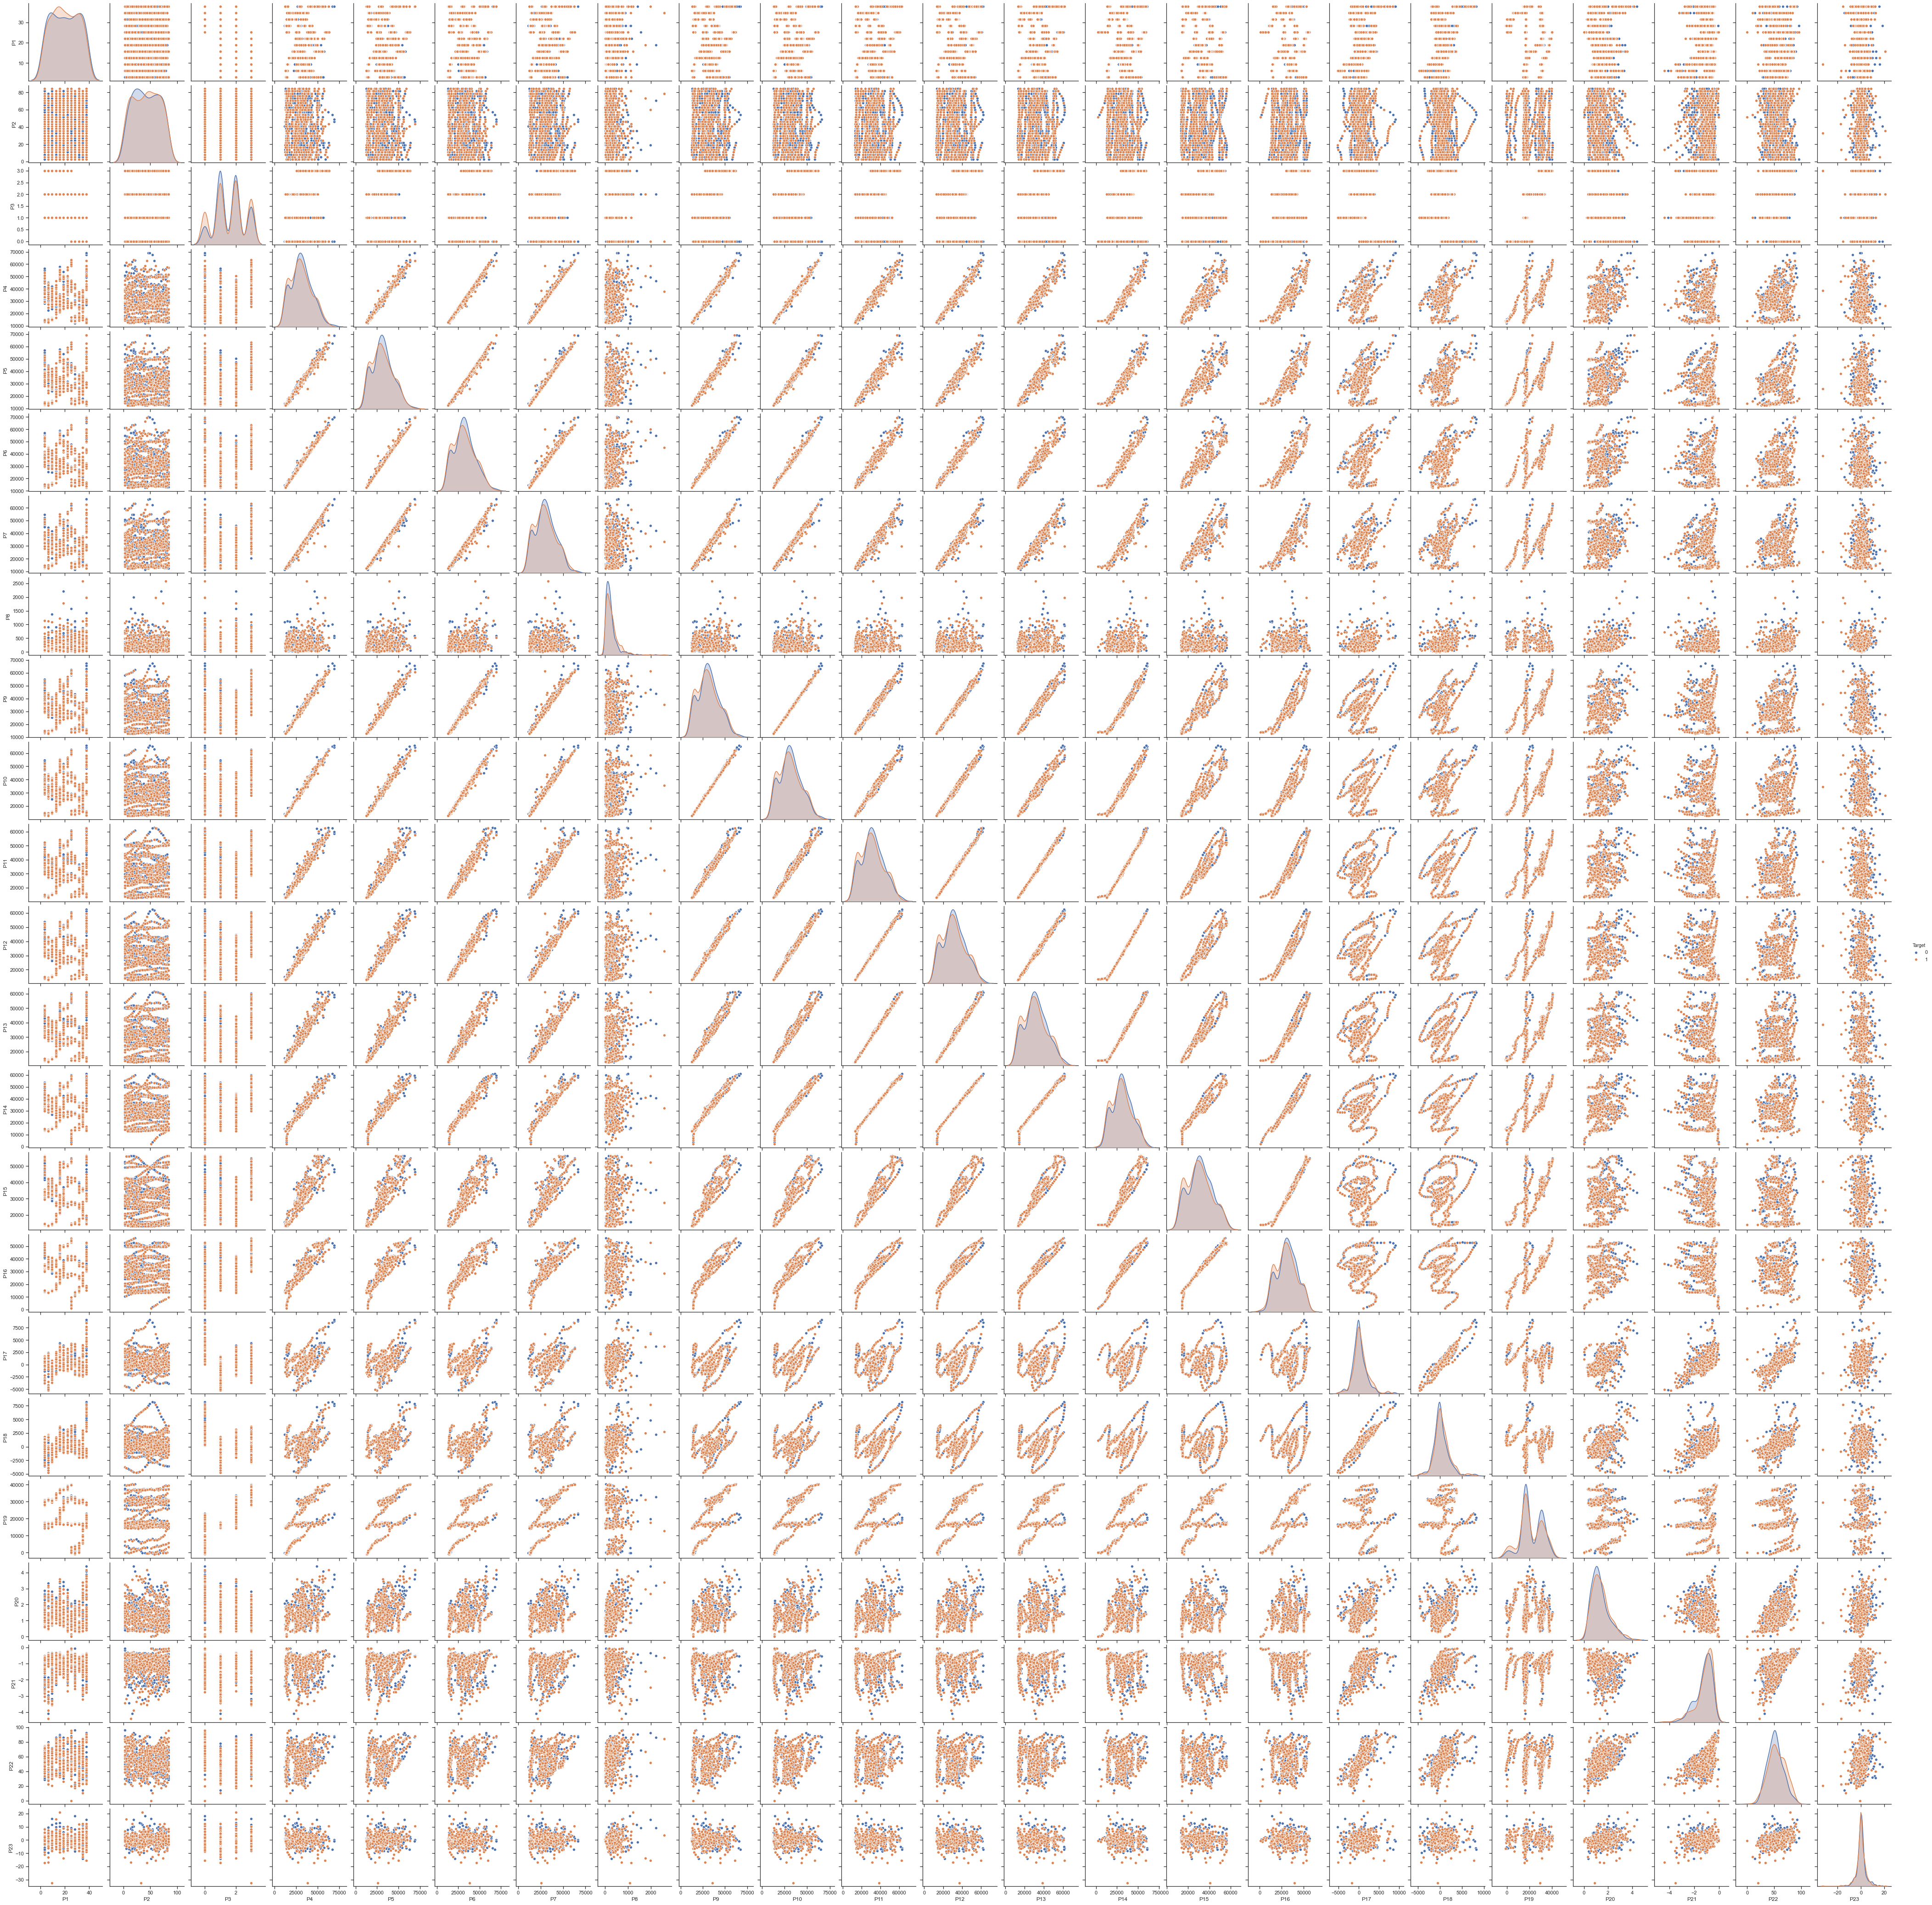

In [398]:
sns.set(style = 'ticks')
sns.pairplot(trainData, hue = 'Target')
plt.show()

From Scatter Plot Matrix we can see that some variables have strong corellation and that most of the variables have Gaussian-like distribution

In [5]:
distinctValues = pd.DataFrame(data = [len(Counter(trainData[el])) for el in trainData.columns],
                                      columns = ['Number Of distinct values'], index = trainData.columns)
distinctValues

Number Of distinct values
P1                             12
P2                             31
P3                              4
P4                            927
P5                            930
P6                            807
P7                            839
P8                            108
P9                            977
P10                           977
P11                           976
P12                           977
P13                           975
P14                           977
P15                           976
P16                           977
P17                           977
P18                           977
P19                           685
P20                           277
P21                           245
P22                           885
P23                           643
Target                          2

P1, P2, P3 variables are categorical, therefore we will check if we can use CHI-square test for dependence
on target variable

In [6]:
print("Minimum count of categories across categorical variables: ")
print("P1 :", min(Counter(trainData['P1']).values()))
print("P2 :", min(Counter(trainData['P2']).values()))
print("P3 :", min(Counter(trainData['P3']).values()))

Minimum count of categories across categorical variables: 
P1 : 68
P2 : 20
P3 : 125


Since all categories have frequency above 5, we can use Chi-square test

In [7]:
from scipy.stats import chi2_contingency, chi2

def areVariablesDependent(data, target):
    freq = pd.crosstab(data, target, margins = False) 
    table = freq.values
    prob = 0.95
    stat, p, dof, expected = chi2_contingency(table)
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical: #Rejecting H0 independence hypothesis
        return True
    elif p <= 1-prob: #Rejecting H0 independence hypothesis
        return True
    else: #Accepting H0 hypothesis
        return False
        
print("Are variables P1 and Target dependent? ", areVariablesDependent(trainData['P1'], trainData['Target']))
print("Are variables P2 and Target dependent? ", areVariablesDependent(trainData['P2'], trainData['Target']))
print("Are variables P3 and Target dependent? ", areVariablesDependent(trainData['P3'], trainData['Target']))

Are variables P1 and Target dependent?  False
Are variables P2 and Target dependent?  False
Are variables P3 and Target dependent?  True


Target variable is not dependent on P1 and P2 therefore we remove these variables. However, target variable is dependent on P3 so we keep it

In [8]:
X = trainData.drop(labels = ['P1', 'P2', 'Target'], axis = 1)
y = trainData['Target']

We will check correlation between variables to see if PCA could be used

Text(0.5, 1.0, 'Spearman correlation coefs')

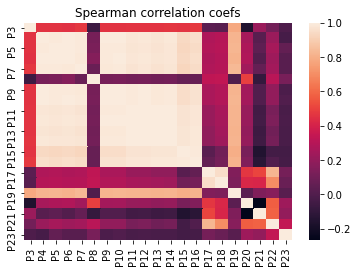

In [9]:
from scipy.stats import spearmanr

#We use spearman correlation coef since we don't know if data has normal distribution

spearmanCorr = [[spearmanr(X.loc[:, el], trainData.loc[:, el1])[0] for el1 in X.columns] for el in X.columns]
spearmanMap = pd.DataFrame(data = spearmanCorr, index = X.columns, columns = X.columns)
#we visualize results with heat map
sns.heatmap(spearmanMap).set_title("Spearman correlation coefs")

From heatmap we can see strong multicollinearity. We will use PCA on other variables except P3

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#First we split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, shuffle = True, random_state = 0)
#Scaling data based on training data
scaler = StandardScaler()
X_train1 = X_train.drop(labels = 'P3', axis = 1)
X_test1 = X_test.drop(labels = 'P3', axis = 1)
scaler.fit(X_train1)
X_trainSt = scaler.transform(X_train1)
X_testSt = scaler.transform(X_test1) #???

#Using train-data fitted PCA on training and test data
numOfComponents = 7
pca = PCA(n_components = numOfComponents)
pcaFit = pca.fit(X_trainSt)
X_trainPCA = pd.DataFrame(data = pca.transform(X_trainSt), columns = [ 'PCA '+str(i)  for i in range(1, numOfComponents+1)])
X_testPCA = pd.DataFrame(data = pca.transform(X_testSt), columns = [ 'PCA '+str(i)  for i in range(1, numOfComponents+1)])
print("% of explained variance in data", np.sum(pca.explained_variance_ratio_*100))
print('\n')
print(X_trainPCA)
#When using 14 as number of components, our new variables explain 99.99 % of variance
#7 components explain 99.33 % of variance

% of explained variance in data 99.33145277314591


        PCA 1     PCA 2     PCA 3     PCA 4     PCA 5     PCA 6     PCA 7
0   -1.090778 -1.829246 -0.056233  0.404739 -0.446588  0.679714  0.097614
1    2.357099 -1.858128 -0.093920  0.415665  0.550429  0.324213 -0.141804
2    0.248568  0.019661 -0.838691  0.195121  0.232923 -0.849990 -0.069493
3    4.579427 -2.022355  1.361526 -0.427378 -1.319337  0.361382  1.119391
4   -1.650377 -1.146816  0.072377 -0.206068 -0.515070 -0.072751  0.188935
..        ...       ...       ...       ...       ...       ...       ...
727  0.434366  0.098785 -1.107967  0.175382 -0.154416 -0.822643 -0.165896
728 -1.835378 -1.350174 -0.332591  0.404021 -0.191398  0.633287  0.096298
729 -5.294491  0.755235  1.317495 -0.010790 -0.947156  0.444222  0.199820
730 -0.197319 -0.789829  2.426095 -3.110936 -0.570116 -1.261964  0.686212
731  1.804912 -0.100256 -0.641880 -0.181703 -0.177799 -0.556530 -0.507348

[732 rows x 7 columns]


We will further investigate data and process it, later compare accuracy with PCA components

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    81.953866
P8        1.493969
P15       3.268314
P18       2.651580
P19       3.071552
P20       5.855917
P21       5.658592
P22       6.096786
P23       1.272528
dtype: float64


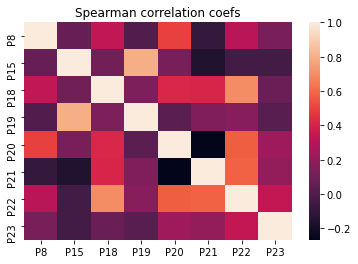

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#From heatmap we can see that variables P4, P5, P6, P7, P9, P10, P11, P12, P13, P14, P15, P16, P17
#have strong multi-collinearity, therefore we drop most of them and 
#check VIF for the remaining variables (iterating this process till variables have VIF below 10)


columns = ['P8', 'P15', 'P18', 'P19','P20', 'P21', 'P22', 'P23']
spearmanCorr1 = [[spearmanr(X.loc[:, el], trainData.loc[:, el1])[0] for el1 in columns] for el in columns]
spearmanMap1 = pd.DataFrame(data = spearmanCorr1, index = columns, columns = columns)
#we visualize results with heat map
sns.heatmap(spearmanMap1).set_title("Spearman correlation coefs")

#We check the rest of the variables with VIF (variance infliation factor)
VIF = X[columns]
VIF = add_constant(VIF)
print(pd.Series([variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])], index = VIF.columns))

#Dropping P22
columnsUsed = ['P3', 'P8', 'P15', 'P18', 'P19', 'P20', 'P21', 'P23']


We will check accuracy and log loss of various models on 7 datasets: 
    1. Initial dataset
    2. PCA components which explain 99.33% of variance
    3. Dataset after filtering out variables by VIF
    4. Initial dataset normalized
    5. Initial dataset standardized
    6. Filtered dataset normalized
    7. Filtered dataset standardized

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train) #to avoid data leakage
dataset1 = X
dataset2 = pd.concat([X_trainPCA, X_testPCA])
dataset3 = trainData[columnsUsed]
[dataset4_a, dataset4_b] = [pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns),
                            pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)]
dataset4 = pd.concat([dataset4_a, dataset4_b])
dataset5 = pd.DataFrame(np.concatenate([X_trainSt, X_testSt]), columns = X_train1.columns) 
#cat variables were previously removed since zeroing out mean makes no sense
dataset5['P1'], dataset5['P2'], dataset5['P3']= trainData['P1'].values, trainData['P2'].values, trainData['P3'].values
scaler = MinMaxScaler().fit(X_train[columnsUsed])
[dataset6_a, dataset6_b] = [pd.DataFrame(data = scaler.transform(X_train[columnsUsed]), columns = columnsUsed),
                            pd.DataFrame(data = scaler.transform(X_test[columnsUsed]), columns = columnsUsed)]
dataset6 = pd.concat([dataset6_a, dataset6_b])
dataset7 = dataset5[columnsUsed]
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7]

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def KNNClassifiersAcc(datasets, algorithm, neighborsRange, accMetric):
    totalAcc = []
    for dataset in datasets:
        acc = []
        for neighbNum in knnRange:
            clf = KNeighborsClassifier(n_neighbors = neighbNum, algorithm = algorithm)
            accuracy = cross_val_score(clf, dataset, y, scoring = accMetric, cv = 10)
            accuracy = -np.mean(accuracy) if accMetric == 'neg_log_loss' else np.mean(accuracy)
            acc.append(accuracy)
        totalAcc.append(acc)
    return totalAcc

algorithms = ['ball_tree', 'kd_tree', 'brute']
accMetrics = ['neg_log_loss', 'precision']
knnRange = np.arange(5, 50)
datasetNames = ['dataset' + str(i) for i in range(1, len(datasets)+1)]
#Loss and accuracy of KNN with different algorithms
log_loss1 = pd.DataFrame(data = KNNClassifiersAcc(datasets, algorithms[0], knnRange, accMetrics[0]),
                         index = datasetNames,
                        columns = ['KNN ' + str(i) for i in knnRange])
accuracy1 = pd.DataFrame(data = KNNClassifiersAcc(datasets, algorithms[0], knnRange, accMetrics[1]),
                         index = datasetNames,
                        columns = ['KNN ' + str(i) for i in knnRange])

log_loss2 = pd.DataFrame(data = KNNClassifiersAcc(datasets, algorithms[1], knnRange, accMetrics[0]),
                         index = datasetNames,
                        columns = ['KNN ' + str(i) for i in knnRange])
accuracy2 = pd.DataFrame(data = KNNClassifiersAcc(datasets, algorithms[1], knnRange, accMetrics[1]),
                         index = datasetNames,
                        columns = ['KNN ' + str(i) for i in knnRange])

log_loss3 = pd.DataFrame(data = KNNClassifiersAcc(datasets, algorithms[2], knnRange, accMetrics[0]),
                         index = datasetNames,
                        columns = ['KNN ' + str(i) for i in knnRange])
accuracy3 = pd.DataFrame(data = KNNClassifiersAcc(datasets, algorithms[2], knnRange, accMetrics[1]),
                         index = datasetNames,
                        columns = ['KNN ' + str(i) for i in knnRange])

log_loss1

KNN 5     KNN 6     KNN 7     KNN 8     KNN 9    KNN 10  \
dataset1  2.023463  1.371316  1.064930  0.952010  0.810624  0.769315   
dataset2  1.746311  1.404961  1.067831  0.895275  0.788472  0.749251   
dataset3  1.722449  1.312446  0.975507  0.836359  0.798439  0.731032   
dataset4  1.657136  1.343555  1.103585  0.933940  0.786339  0.775637   
dataset5  1.938947  1.228791  1.115644  0.976062  0.935770  0.859586   
dataset6  1.778351  1.334588  1.057893  0.860453  0.815754  0.742031   
dataset7  1.711401  1.165366  0.952449  0.906817  0.805210  0.733358   

            KNN 11    KNN 12    KNN 13    KNN 14  ...    KNN 40    KNN 41  \
dataset1  0.729320  0.720946  0.711045  0.714410  ...  0.696091  0.695152   
dataset2  0.742417  0.735783  0.729626  0.727554  ...  0.704517  0.702286   
dataset3  0.728317  0.726983  0.722150  0.718516  ...  0.695035  0.693624   
dataset4  0.738834  0.730587  0.730357  0.727497  ...  0.709149  0.708178   
dataset5  0.816450  0.771550  0.735345  0.733539  ...  0.702626  0.700763   
dataset6  0.739714  0.733276  0.732923  0.727553  ...  0.708549  0.707455   
dataset7  0.733368  0.729728  0.724178  0.723433  ...  0.707184  0.707026   

            KNN 42    KNN 43    KNN 44    KNN 45    KNN 46    KNN 47  \
dataset1  0.695661  0.694713  0.694218  0.693552  0.693524  0.693585   
dataset2  0.701398  0.701522  0.699726  0.700283  0.699301  0.700205   
dataset3  0.693869  0.695594  0.694092  0.694340  0.694302  0.693686   
dataset4  0.707644  0.706420  0.705414  0.703893  0.704568  0.705390   
dataset5  0.701018  0.700238  0.700028  0.699484  0.698191  0.697431   
dataset6  0.706099  0.707119  0.705897  0.705651  0.705445  0.704963   
dataset7  0.706020  0.705091  0.703612  0.702967  0.702297  0.702875   

            KNN 48    KNN 49  
dataset1  0.694346  0.694380  
dataset2  0.701086  0.700987  
dataset3  0.693664  0.694057  
dataset4  0.704504  0.704422  
dataset5  0.696447  0.696444  
dataset6  0.705485  0.705339  
dataset7  0.702143  0.701334  

[7 rows x 45 columns]

In [159]:
#loss - DataFrame with all loss values between datasets and with different paremeters (DataFrame)
#accuracy - DataFrame with all accuracy values between datasets and with different paremeters (DataFrame)
#name - name of all this plot (string)
#lossthr - loss threshold whose indice we want to plot (float)
#isLossMore - specify if we want loss values below or above lossthr (Boolean)
#accthr - accuracy threshold whose indice we want to plot (float)
#isAccMore - specify if we want accuracy indice values below or above accthr (Boolean)
#xRange - range of X axis 
def plotAccuracyAndLoss(loss, accuracy, name, lossthr, isLossMore, accthr, isAccMore, xRange):
    fig, axs = plt.subplots(2, 2) #Creating plot
    fig.suptitle(name)
    datasetNames = ['dataset' + str(i) for i in range(1, len(datasets)+1)]
    #Preparing loss and accuracy variables. x variables return all x axis values
    #Variables used to plot specific parts of data which have to fullfil specified conditions. For instance,
    #prepare x, y axis variables whose loss value is above (isLossMore = True) 0.7 (lossthr = 0.7)
    y_valsLoss = [loss.loc[datasetNames[i], :].
              values[(loss.loc[datasetNames[i], :] > lossthr if isLossMore else loss.
                      loc[datasetNames[i], :] < lossthr)] for i in range(0, len(datasets))]
    #Preparing accuracy variables
    y_valsAcc = [accuracy.loc[datasetNames[i], :].
              values[(accuracy.loc[datasetNames[i], :] > accthr if isAccMore else accuracy.
                      loc[datasetNames[i], :] < accthr)] for i in range(0, len(datasets))]
    
    x_valsLoss = [xRange[(loss.loc[datasetNames[i], :] > lossthr if isLossMore else loss.
                   loc[datasetNames[i], :] < lossthr)] for i in range(0, len(datasets))]
    x_valsAcc = [xRange[(accuracy.loc[datasetNames[i], :] > accthr if isAccMore else accuracy.
                   loc[datasetNames[i], :] < accthr)] for i in range(0, len(datasets))]

    #Plotting graphs
    plottingData(axs, 0, 0, x_valsAcc, y_valsAcc, '0.5 thershold Acc')
    plottingData(axs, 1, 0, None, accuracy.values, 'Acc')
    plottingData(axs, 0, 1, x_valsLoss, y_valsLoss, '0.7 threshold Loss')
    plottingData(axs, 1, 1, None, loss.values, 'Loss')
    plt.legend()
    plt.show()
            
def plottingData(axs, cord1, cord2, dataX, dataY, graphName):
    colors = ['g', 'b', 'r', 'c', 'm', 'y', 'k']
    labels = ['dataset' + str(i) for i in range(1, 8)]
    for i in range(len(dataY)):
        if len(dataY[i]) != 0 and dataX is not None: 
            axs[cord1, cord2].plot(dataX[i], dataY[i], colors[i], label = labels[i])
            axs[cord1, cord2].set_title(graphName)
        elif len(dataY[i]) != 0: #When X-axis values are not specified
            axs[cord1, cord2].plot(dataY[i], colors[i], label = labels[i])
            axs[cord1, cord2].set_title(graphName)
    #Create array with colors, so each label would have only 1 color

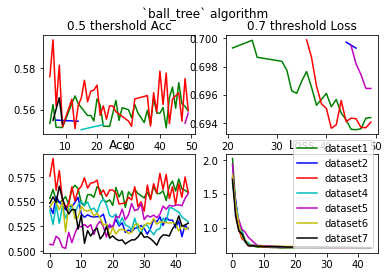

In [158]:
plotAccuracyAndLoss(log_loss1, accuracy1,"`ball_tree` algorithm", 0.7, False, 0.55, True, knnRange)

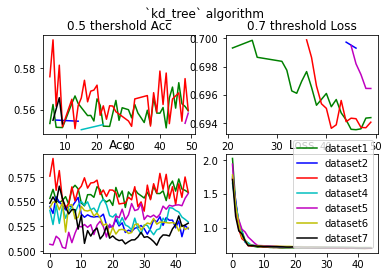

In [86]:
plotAccuracyAndLoss(log_loss2, accuracy2,"`kd_tree` algorithm", 0.7, False, 0.55, True, knnRange)

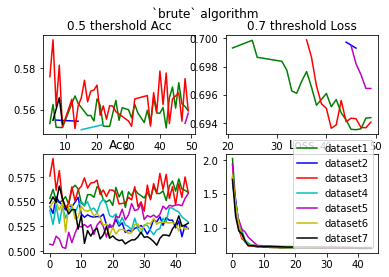

In [87]:
plotAccuracyAndLoss(log_loss3, accuracy3,"`brute` algorithm", 0.7, False, 0.55, True, knnRange)

From KNN results we can see that all 3 algorithms such as 'ball_tree', 'kd_tree', 'brute'  within KNN yield almost identical results.
In addition, we can see that model with dataset3 reaches highest accuracy and lowest loss. 2nd best dataset is dataset1

In [514]:
from sklearn.linear_model import LogisticRegression

def LogisticRegressionClassifier(datasets, solver, penalty, regValues, accMetric, customY = None):
    totalAcc = []
    for dataset in datasets:
        acc = []
        for reg in regValues:
            clf = LogisticRegression(solver = solver, max_iter = 1000,
                                 penalty = penalty, C = reg)
            if customY is None:
                accuracy = cross_val_score(clf, dataset, y, scoring = accMetric, cv = 10)
            else:
                accuracy = cross_val_score(clf, dataset, customY, scoring = accMetric, cv = 10)
            accuracy = -np.mean(accuracy) if accMetric == 'neg_log_loss' else np.mean(accuracy)
            acc.append(accuracy)
        totalAcc.append(acc)
    return totalAcc

regValues = np.arange(0.2, 1.05, 0.05)

log_loss4 = pd.DataFrame(data = LogisticRegressionClassifier(datasets,'liblinear', 'l2', regValues, 'neg_log_loss'),
                         index = datasetNames,
                         columns = ['penalty ' + str(round(val, 2)) for val in regValues])

accuracy4 = pd.DataFrame(data = LogisticRegressionClassifier(datasets,'liblinear', 'l2', regValues, 'precision'),
                         index = datasetNames,
                         columns = ['penalty ' + str(round(val, 2)) for val in regValues])
log_loss4

penalty 0.2  penalty 0.25  penalty 0.3  penalty 0.35  penalty 0.4  \
dataset1     0.739592      0.739072     0.739169      0.740461     0.738200   
dataset2     0.700142      0.700203     0.700245      0.700276     0.700299   
dataset3     0.689938      0.688898     0.690079      0.690214     0.689392   
dataset4     0.695910      0.696253     0.696531      0.696765     0.696965   
dataset5     0.701803      0.701881     0.701945      0.702009     0.702070   
dataset6     0.694912      0.695286     0.695595      0.695857     0.696085   
dataset7     0.700621      0.700714     0.700779      0.700826     0.700863   

          penalty 0.45  penalty 0.5  penalty 0.55  penalty 0.6  penalty 0.65  \
dataset1      0.739252     0.740150      0.740505     0.740075      0.740170   
dataset2      0.700317     0.700332      0.700344     0.700354      0.700363   
dataset3      0.690541     0.690219      0.689265     0.688996      0.689933   
dataset4      0.697140     0.697295      0.697433     0.697557      0.697671   
dataset5      0.702128     0.702186      0.702238     0.702287      0.702349   
dataset6      0.696284     0.696463      0.696623     0.696769      0.696903   
dataset7      0.700891     0.700915      0.700934     0.700950      0.700964   

          penalty 0.7  penalty 0.75  penalty 0.8  penalty 0.85  penalty 0.9  \
dataset1     0.739153      0.739682     0.739919      0.740146     0.740067   
dataset2     0.700370      0.700377     0.700383      0.700388     0.700392   
dataset3     0.689801      0.689569     0.690358      0.689431     0.690088   
dataset4     0.697773      0.697868     0.697954      0.698035     0.698110   
dataset5     0.702392      0.702462     0.702495      0.702554     0.702605   
dataset6     0.697026      0.697139     0.697244      0.697343     0.697434   
dataset7     0.700976      0.700987     0.700996      0.701004     0.701011   

          penalty 0.95  penalty 1.0  
dataset1      0.741093     0.741357  
dataset2      0.700396     0.700400  
dataset3      0.689516     0.690055  
dataset4      0.698180     0.698245  
dataset5      0.702655     0.702707  
dataset6      0.697520     0.697602  
dataset7      0.701018     0.701024

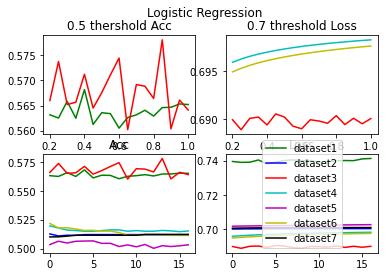

In [167]:
plotAccuracyAndLoss(log_loss4, accuracy4,'Logistic Regression', 0.7, False, 0.55, True, regValues)

From Logistic Regression algorithm results we can see that best-performing datasets are dataset3 and dataset1

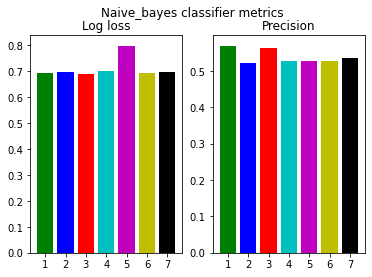

In [127]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

bern = BernoulliNB()
gauss = GaussianNB()
bernLoss = []
bernscores = []
gausLoss = []
gausscores = []

for dataset in datasets:
    loss1 = cross_val_score(bern, dataset, y, scoring = 'neg_log_loss', cv = 10)
    acc1 = cross_val_score(bern, dataset, y, scoring = 'precision', cv = 10)
    bernLoss.append(-np.mean(loss1))
    bernscores.append(np.mean(acc1))
    
    loss2 = cross_val_score(gauss, dataset, y, scoring = 'neg_log_loss', cv = 10)
    acc2 = cross_val_score(gauss, dataset, y, scoring = 'precision', cv = 10)
    gausLoss.append(-np.mean(loss2))
    gausscores.append(np.mean(acc2))

#plotting
fig, axes = plt.subplots(1, 2)
colors = ['g', 'b', 'r', 'c', 'm', 'y', 'k']
fig.suptitle('Naive_bayes classifier metrics')
datasetNamesNr = [str(i) for i in range(1, 8)]
axes[0].bar(datasetNamesNr, bernLoss, color = colors)
axes[0].set_title('Log loss')
axes[1].bar(datasetNamesNr, bernscores, color = colors)
axes[1].set_title('Precision')
plt.show()

From Naive bayes classificator we can see that all datasets except dataset5 have similar log loss while dataset1 has highest accuracy. 2nd best dataset is dataset3

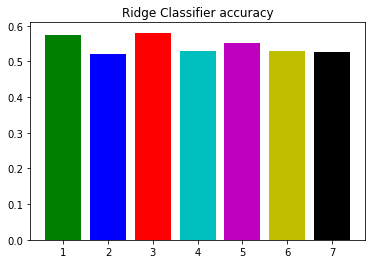

In [320]:
from sklearn.linear_model import RidgeClassifierCV

scoresRid = []
for dataset in datasets:
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(dataset, y)
    scoresRid.append(clf.score(dataset, y))
plt.bar(datasetNamesNr, scoresRid, color = colors)
plt.title('Ridge Classifier accuracy')
plt.show()

Since we couldn't measure Ridge classifier log loss we check Accuracy and we can see  that dataset3 has highest accuracy, 2nd best accuracy is reached by dataset1 and 3rd - dataset5.

In [163]:
from sklearn.svm import SVC, NuSVC

def SVMClassifier(datasets, C, kernel, scoring):
    scores = []
    for dataset in datasets:
        dataScores = []
        for val in C:
            clf = SVC(C = val, probability = True, kernel = kernel)
            scor = cross_val_score(clf, dataset, y, cv = 10, scoring = scoring)
            scor = -np.mean(scor) if scoring == 'neg_log_loss' else np.mean(scor)
            dataScores.append(scor)
        scores.append(dataScores)
    return scores

C = [0.05, 0.25, 0.5, 1, 5, 25, 50, 75, 100, 125, 150]

#log_loss5 = SVMClassifier(datasets, C, 'sigmoid', 'neg_log_loss')
#accuracy5 = SVMClassifier(datasets, C, 'sigmoid', 'precision')
kernels = ['poly', 'rbf', 'sigmoid']

log_loss5 = pd.DataFrame(data = SVMClassifier(datasets, C, kernels[0], 'neg_log_loss'), index = datasetNames,
                         columns = ['C ' + str(round(val, 2)) for val in C])
accuracy5 = pd.DataFrame(data = SVMClassifier(datasets, C, kernels[0], 'precision'), index = datasetNames,
                         columns = ['C ' + str(round(val, 2)) for val in C])

log_loss6 = pd.DataFrame(data = SVMClassifier(datasets, C, kernels[1], 'neg_log_loss'), index = datasetNames,
                         columns = ['C ' + str(round(val, 2)) for val in C])
accuracy6 = pd.DataFrame(data = SVMClassifier(datasets, C, kernels[1], 'precision'), index = datasetNames,
                         columns = ['C ' + str(round(val, 2)) for val in C])

log_loss7 = pd.DataFrame(data = SVMClassifier(datasets, C, kernels[2], 'neg_log_loss'), index = datasetNames,
                         columns = ['C ' + str(round(val, 2)) for val in C])
accuracy7 = pd.DataFrame(data = SVMClassifier(datasets, C, kernels[2], 'precision'), index = datasetNames,
                         columns = ['C ' + str(round(val, 2)) for val in C])

log_loss5

C 0.05    C 0.25     C 0.5       C 1       C 5      C 25  \
dataset1  0.691902  0.694496  0.694426  0.693401  0.692347  0.691596   
dataset2  0.692892  0.692013  0.692355  0.692365  0.695463  0.693645   
dataset3  0.691497  0.693095  0.693710  0.692513  0.693162  0.693157   
dataset4  0.692651  0.690170  0.689711  0.691482  0.693297  0.695148   
dataset5  0.693647  0.692428  0.691634  0.692187  0.691741  0.690718   
dataset6  0.692557  0.690738  0.689587  0.691203  0.691125  0.691869   
dataset7  0.691710  0.695373  0.693533  0.694594  0.694325  0.694031   

              C 50      C 75     C 100     C 125     C 150  
dataset1  0.690312  0.691675  0.690346  0.689952  0.690770  
dataset2  0.693519  0.692410  0.693611  0.692838  0.692747  
dataset3  0.692009  0.693735  0.693728  0.692685  0.691702  
dataset4  0.693675  0.691721  0.692883  0.691902  0.691813  
dataset5  0.687707  0.689369  0.688484  0.687877  0.687515  
dataset6  0.692011  0.691893  0.691907  0.691599  0.691813  
dataset7  0.694066  0.694182  0.693234  0.692937  0.694155

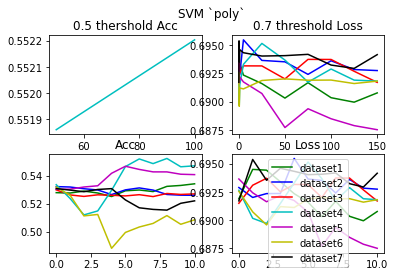

In [168]:
C = np.asarray(C)
plotAccuracyAndLoss(log_loss5, accuracy5,'SVM `poly`', 0.7, False, 0.55, True, C)

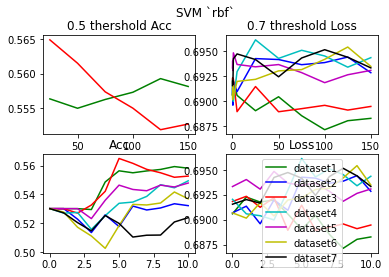

In [170]:
plotAccuracyAndLoss(log_loss6, accuracy6,'SVM `rbf`', 0.7, False, 0.55, True, C)

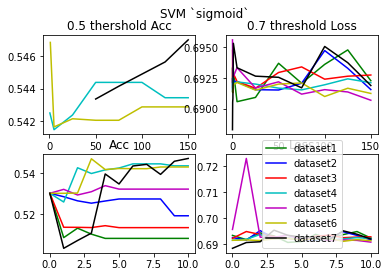

In [173]:
plotAccuracyAndLoss(log_loss7, accuracy7,'SVM `sigmoid`', 0.7, False, 0.54, True, C)

The highest accuracy in SVM is reached  by dataset3 with 'rbf' kernel

In [301]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

def RfClassifier(datasets, paramValues, scoring):
    scores = []
    for dataset in datasets:
        dataScores = []
        for val in paramValues:
            clf = RandomForestClassifier(random_state = 0, n_estimators = val)
            scor = cross_val_score(clf, dataset, y, cv = 10, scoring = scoring)
            scor = -np.mean(scor) if scoring == 'neg_log_loss' else np.mean(scor)
            dataScores.append(scor)
        scores.append(dataScores)
    return scores

n_estimators = np.arange(100, 500, 50)


log_loss8 = pd.DataFrame(data = RfClassifier(datasets, n_estimators, 'neg_log_loss'), index = datasetNames,
                         columns = ['Trees ' + str(round(val, 2)) for val in n_estimators])
accuracy8 = pd.DataFrame(data = RfClassifier(datasets, n_estimators, 'precision'), index = datasetNames,
                         columns = ['Trees ' + str(round(val, 2)) for val in n_estimators])

In [528]:
accuracy8

Trees 100  Trees 150  Trees 200  Trees 250  Trees 300  Trees 350  \
dataset1   0.570094   0.573621   0.576511   0.571380   0.573346   0.576372   
dataset2   0.528049   0.532134   0.540813   0.545247   0.543050   0.538591   
dataset3   0.558511   0.568730   0.559622   0.564559   0.561411   0.567047   
dataset4   0.526084   0.520071   0.533614   0.530710   0.525104   0.526317   
dataset5   0.523380   0.512368   0.512637   0.518805   0.525415   0.520124   
dataset6   0.544606   0.537489   0.530839   0.531956   0.535413   0.531181   
dataset7   0.537151   0.542947   0.548271   0.545568   0.547116   0.547737   

          Trees 400  Trees 450  
dataset1   0.580916   0.581215  
dataset2   0.542970   0.545432  
dataset3   0.562325   0.561433  
dataset4   0.526361   0.528691  
dataset5   0.527070   0.524772  
dataset6   0.533644   0.533160  
dataset7   0.547908   0.551974

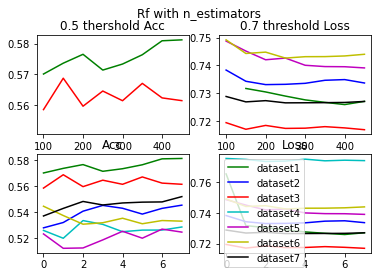

In [303]:
plotAccuracyAndLoss(log_loss8, accuracy8,'Rf with n_estimators', 0.75, False, 0.55, True, n_estimators)

In [307]:
from sklearn.ensemble import AdaBoostClassifier

def AdaBClassifier(datasets, paramValues, scoring):
    scores = []
    for dataset in datasets:
        dataScores = []
        for val in paramValues:
            clf = AdaBoostClassifier(random_state = 0, n_estimators = val)
            scor = cross_val_score(clf, dataset, y, cv = 10, scoring = scoring)
            scor = -np.mean(scor) if scoring == 'neg_log_loss' else np.mean(scor)
            dataScores.append(scor)
        scores.append(dataScores)
    return scores

n_estimators = np.arange(100, 500, 50)

log_loss9 = pd.DataFrame(data = AdaBClassifier(datasets, n_estimators, 'neg_log_loss'), index = datasetNames,
                         columns = ['Est ' + str(round(val, 2)) for val in n_estimators])
accuracy9 = pd.DataFrame(data = AdaBClassifier(datasets, n_estimators, 'precision'), index = datasetNames,
                         columns = ['Est ' + str(round(val, 2)) for val in n_estimators])

log_loss9

Est 100   Est 150   Est 200   Est 250   Est 300   Est 350  \
dataset1  0.693486  0.693130  0.693088  0.693104  0.693065  0.693034   
dataset2  0.694233  0.693816  0.693761  0.693554  0.693473  0.693473   
dataset3  0.693401  0.693291  0.693227  0.693133  0.693096  0.693089   
dataset4  0.694200  0.694009  0.693679  0.693731  0.693717  0.693649   
dataset5  0.694730  0.694111  0.693816  0.693815  0.693791  0.693683   
dataset6  0.693746  0.693501  0.693287  0.693258  0.693287  0.693279   
dataset7  0.693683  0.693471  0.693355  0.693277  0.693243  0.693266   

           Est 400   Est 450  
dataset1  0.693038  0.693013  
dataset2  0.693428  0.693378  
dataset3  0.693113  0.693117  
dataset4  0.693572  0.693535  
dataset5  0.693640  0.693547  
dataset6  0.693258  0.693216  
dataset7  0.693314  0.693297

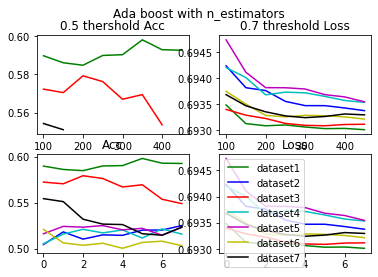

In [311]:
plotAccuracyAndLoss(log_loss9, accuracy9,'Ada boost with n_estimators', 0.7, False, 0.55, True, n_estimators)

In [308]:
from sklearn.ensemble import GradientBoostingClassifier

def GradBClassifier(datasets, paramValues, scoring):
    scores = []
    for dataset in datasets:
        dataScores = []
        for val in paramValues:
            clf = GradientBoostingClassifier(random_state = 0, n_estimators = val)
            scor = cross_val_score(clf, dataset, y, cv = 10, scoring = scoring)
            scor = -np.mean(scor) if scoring == 'neg_log_loss' else np.mean(scor)
            dataScores.append(scor)
        scores.append(dataScores)
    return scores

n_estimators = np.arange(100, 500, 50)

log_loss10 = pd.DataFrame(data = GradBClassifier(datasets, n_estimators, 'neg_log_loss'), index = datasetNames,
                         columns = ['Est ' + str(round(val, 2)) for val in n_estimators])
accuracy10 = pd.DataFrame(data = GradBClassifier(datasets, n_estimators, 'precision'), index = datasetNames,
                         columns = ['Est ' + str(round(val, 2)) for val in n_estimators])

log_loss10

Est 100   Est 150   Est 200   Est 250   Est 300   Est 350  \
dataset1  0.713601  0.731316  0.748187  0.764184  0.783630  0.801486   
dataset2  0.722396  0.739226  0.753547  0.772454  0.792678  0.811698   
dataset3  0.707379  0.722864  0.738095  0.754890  0.771984  0.785708   
dataset4  0.761829  0.787601  0.808655  0.832390  0.857476  0.881564   
dataset5  0.751893  0.776584  0.798345  0.820159  0.841528  0.865373   
dataset6  0.748839  0.775878  0.797692  0.819712  0.843018  0.868512   
dataset7  0.747328  0.776499  0.804958  0.825545  0.850554  0.870796   

           Est 400   Est 450  
dataset1  0.816600  0.830151  
dataset2  0.832408  0.852200  
dataset3  0.801264  0.814605  
dataset4  0.908409  0.932482  
dataset5  0.891320  0.914258  
dataset6  0.891894  0.913045  
dataset7  0.893986  0.916263

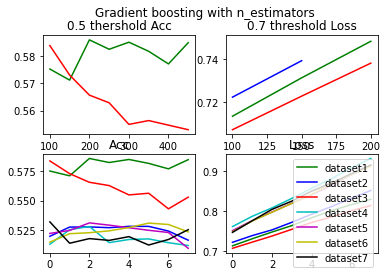

In [310]:
plotAccuracyAndLoss(log_loss10, accuracy10,'Gradient boosting with n_estimators', 0.75, False, 0.55, True, n_estimators)

In [346]:
clf = AdaBoostClassifier(random_state = 0, n_estimators = 350)
scor = cross_val_score(clf, datasets[0], y, cv = 10, scoring = 'precision')
np.mean(scor)

0.5980771158159459

Evaluate all datasets based on best cases of each algorithm? Maybe take the average and then choose 3 best performing datasets and use them for further analysis

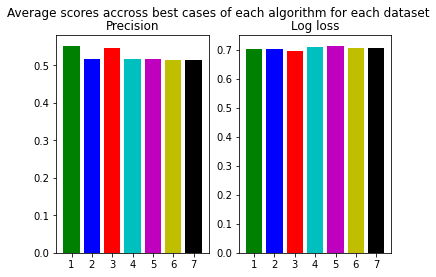

In [345]:
#Taking average of best cases of algortihms and using bar chart, also use precision and neg_log_loss values

def getDatasetResults(dataDFArray, dataList, datasetNames, isMax):
    scores = []
    for i in range(len(datasetNames)):
        datasetScores = []
        for dataDF in dataDFArray:
            maxEl = max(dataDF.loc[datasetNames[i], :]) if isMax == 'max' else min(dataDF.loc[datasetNames[i], :])
            datasetScores.append(maxEl)
        for dataLi in dataList:
            datasetScores.append(dataLi[i])
        scores.append(np.mean(datasetScores))
    return scores

#All dataframes
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy9, accuracy10]
losses = [log_loss1, log_loss2, log_loss3, log_loss4, log_loss5, log_loss6, log_loss7, log_loss8, log_loss9, log_loss10]
#Lists
accLists = [bernscores, scoresRid]
lossLists = [bernLoss]

allLosses = getDatasetResults(losses, lossLists, datasetNames, False)
allAccuracies = getDatasetResults(accuracies, accLists, datasetNames, True)

fig, ax = plt.subplots(1, 2)
fig.suptitle('Average scores accross best cases of each algorithm for each dataset')
ax[0].bar(datasetNamesNr, allAccuracies, color = colors)
ax[0].set_title('Precision')
ax[1].set_title('Log loss')
ax[1].bar(datasetNamesNr, allLosses, color = colors)
plt.show()

Accross all cases we can see that dataset1 has highest precision and one of the lowest log loss.
2nd best dataset is dataset3.

In [396]:
#Compare algorithms between each_other. Best case of each algorithm with each_other for dataset1 and dataset3
def getBestCases(dataDFArray, dataList, datasetNames, isMax, algorithmNamesDf):
#(datasetNames, dataList, dataDFArray, algorithmNamesDf, isMax):
    datasetRes = []
    datasetResNames = []
    for i in range(len(datasetNames)):
        datasetScores = []
        names = []
        for dataDF in dataDFArray:
            el = max(dataDF.loc[datasetNames[i], :]) if isMax == 'max' else min(dataDF.loc[datasetNames[i], :])
            name = np.argmax(dataDF.loc[datasetNames[i], :])
            datasetScores.append(el)
            names.append(name)
        for dataLi in dataList:
            datasetScores.append(dataLi[i])
            names.append('Default')
        datasetRes.append(datasetScores)
        datasetResNames.append(names)
    finalTable = pd.DataFrame(data = datasetRes, index = datasetNames, columns = algorithmNamesDf)
    return (finalTable, datasetResNames)
    #DataFrame algorithm names    
algorithmNames = ['KNN ball_tree', 'KNN kd_tree', 'KNN brute', 'Log regre', 
                  'SVM poly', 'SVM rbf', 'SVM sigmoid', 'RF', 'AdaB', 'Gradb', 'Naive_bayes']

res1, bestAlgParamNames1 = getBestCases(losses, lossLists, ['dataset1', 'dataset3'], False, algorithmNames)
#res1
res2, bestAlgParamNames2 = getBestCases(accuracies, [bernscores], ['dataset1', 'dataset3'], True, algorithmNames)
res2

KNN ball_tree  KNN kd_tree  KNN brute  Log regre  SVM poly  \
dataset1       0.544144     0.544144   0.544144   0.560519  0.525011   
dataset3       0.540403     0.540403   0.540403   0.560204  0.524981   

           SVM rbf  SVM sigmoid        RF      AdaB     Gradb  Naive_bayes  
dataset1  0.529569     0.508450  0.570094  0.584804  0.571185     0.569401  
dataset3  0.527109     0.513635  0.558511  0.548925  0.543011     0.521973

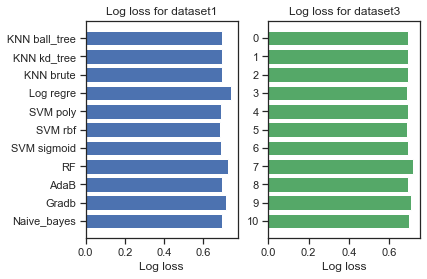

In [443]:
y_pos = np.arange(len(algorithmNames))

fig, ax = plt.subplots(1, 2)

ax[0].barh(y_pos, res1.loc[['dataset1'], :].values.flatten())
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(algorithmNames)
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Log loss')
ax[0].set_title('Log loss for dataset1')

ax[1].barh(y_pos, res1.loc[['dataset3'], :].values.flatten(), color = 'g')
ax[1].set_yticks(y_pos)
#ax[1].set_yticklabels(algorithmNames)
ax[1].invert_yaxis()  # labels read top-to-bottom
ax[1].set_xlabel('Log loss')
ax[1].set_title('Log loss for dataset3')

plt.show()

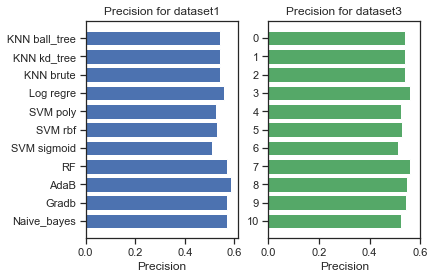

In [449]:
fig, ax = plt.subplots(1, 2)

ax[0].barh(y_pos, res2.loc[['dataset1'], :].values.flatten())
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(algorithmNames)
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Precision')
ax[0].set_title('Precision for dataset1')

ax[1].barh(y_pos, res2.loc[['dataset3'], :].values.flatten(), color = 'g')
ax[1].set_yticks(y_pos)
#ax[1].set_yticklabels(algorithmNames)
ax[1].invert_yaxis()  # labels read top-to-bottom
ax[1].set_xlabel('Precision')
ax[1].set_title('Precision for dataset3')
plt.xlim(0, 0.6)
plt.show()

From results we can see that for both dataset1 and dataset3 best results are reached by Random Forest algorithm (lowest log loss and highest precision)